In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# linear algebra
Most of these notes correspond to the [video lectures](http://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/) by Professor Gilbert Strang of MIT.

# the geometry of linear equations
The fundamental problem of linear algebra is to solve a system of linear equations. We'll start with the case of $n$ equations and $n$ unknowns.

Here are two lines that cross somewhere in a plane we're looking for the point where they cross.

$
\left\{
\begin{aligned}
2x - y &= 0 \\ 
-x + 2y &= 3
\end{aligned}
\right.
$

As a preview (and because it's so easy to do) we'll quickly skip to the *matrix form* and write down:

$
\begin{bmatrix}2 & -1 \\ -1 & 2\end{bmatrix}
\begin{bmatrix}x \\ y\end{bmatrix} = 
\begin{bmatrix}0 \\ 3\end{bmatrix}
$

Where $A = \begin{bmatrix}2 & -1 \\ -1 & 2\end{bmatrix}$ $x = \begin{bmatrix}x \\ y\end{bmatrix}$ and $b = \begin{bmatrix}0 \\ 3\end{bmatrix}$.

We'll end up with $Ax = b$.

#### row picture
Let's start by plotting the equations.

$
\left\{
\begin{aligned}
2x - y &= 0 \implies y = 2x\\ 
-x + 2y &= 3 \implies 2y = x + 3 \implies y = \frac{1}{2}x + 1\frac{1}{2}
\end{aligned}
\right.
$

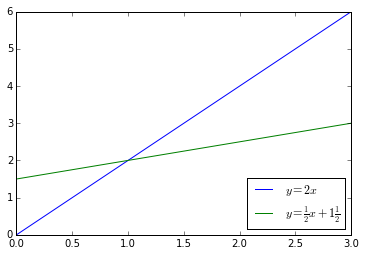

In [2]:
f1 = lambda x: 2*x
f2 = lambda x: (1/2*x) + 1 + (1/2)
x = np.linspace(0, 3, 100)
plt.plot(x, f1(x), label=r'$y = 2x$')
plt.plot(x, f2(x), label=r'$y = \frac{1}{2}x + 1\frac{1}{2}$')
plt.legend(loc=4)

We are interested in the value of $x$ where $2x = \frac{1}{2}x + 1\frac{1}{2}$ we can solve this pretty easily by saying that $2x - \frac{1}{2}x = 1\frac{1}{2}$ which simplifies to $1\frac{1}{2}x = 1\frac{1}{2}$. Now we can divide both sides by $1\frac{1}{2}$ and we'll end up with $x = 1$.

#### column picture
Let's take a look at the columns of the matrix form.

$x\begin{bmatrix}2 \\ -1\end{bmatrix} + y\begin{bmatrix}-1 \\ 2\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}$

The equation above is asking us to somehow combine the two vectors in the right amounts so we'll end up with a vector $\begin{bmatrix}0 \\ 3\end{bmatrix}$. 

We need to find the right *linear combination* of $x$ and $y$. We'll start by plotting the vectors.

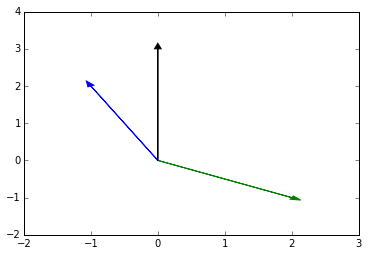

In [3]:
ax = plt.axes()
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 4)
ax.arrow(0, 0, 2, -1, head_width=0.1, fc='g', ec='g', label='foo')
ax.arrow(0, 0, -1, 2, head_width=0.1, fc='b', ec='b')
ax.arrow(0, 0, 0, 3, head_width=0.1, fc='k', ec='k')

From the row picture earlier we already know that the right combination is $x = 1$ and $y = 2$ so:

$1\begin{bmatrix}2 \\ -1\end{bmatrix} + 2\begin{bmatrix}-1 \\ 2\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}$

We can plot and show how it works as well.

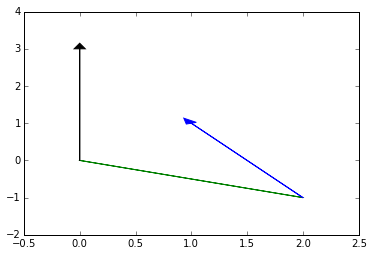

In [4]:
ax = plt.axes()
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-2, 4)
ax.arrow(0, 0, 2, -1, head_width=0.0, fc='g', ec='g', label='foo')
ax.arrow(2, -1, -1, 2, head_width=0.1, fc='b', ec='b')
ax.arrow(0, 0, 0, 3, head_width=0.1, fc='k', ec='k')

Let's do a 3D example.

$
\left\{
\begin{aligned}
2x - &y &= 0 \\ 
-x + 2&y - z &= -1 \\
-3&y + 4z &= 4
\end{aligned}
\right.
$

We're in three dimensions with unknowns $x$, $y$ and $z$.

The matrix $A$ is $\begin{bmatrix}2 & -1 & 0\\-1 & 2 & -1\\0 & -3 & 4\end{bmatrix}$

And our right hand side $b$ is the vector $\begin{bmatrix}0 \\ -1 \\ 4\end{bmatrix}$

Looking at the *row picture*, when dealing with a $2 \times 2$ problem each row is a line in two dimensions. Each row in a $3 \times 3$ problem gives us a plane in three dimensions.

If we look at the *column picture* we get:

$x\begin{bmatrix}2\\-1\\0\end{bmatrix} + y\begin{bmatrix}-1\\2\\-3\end{bmatrix} + z\begin{bmatrix}0\\-1\\4\end{bmatrix} = \begin{bmatrix}0\\-1\\4\end{bmatrix}$

And we can already see that $x = 0$, $y = 0$ and $z = 1$. Of course we won't always be able to see it so easily though.

In [5]:
vec3 = lambda x,y,z: np.array((x,y,z))
A, B, C = vec3(2, -1, 0), vec3(-1, 2, -3), vec3(0, -1, 4)
x, y, z = 0, 0, 1
(x*A) + (y*B) + (z*C)

array([ 0, -1,  4])

Let's change the right hand side to something different so that we have:

$x\begin{bmatrix}2\\-1\\0\end{bmatrix} + y\begin{bmatrix}-1\\2\\-3\end{bmatrix} + z\begin{bmatrix}0\\-1\\4\end{bmatrix} = \begin{bmatrix}1\\1\\-3\end{bmatrix}$

In this case we made up $b$ by taking the sum of the first two columns of $A$:

$b = \begin{bmatrix}2\\-1\\0\end{bmatrix} + \begin{bmatrix}-1\\2\\-3\end{bmatrix} = \begin{bmatrix}1\\1\\-3\end{bmatrix}$

And $x = 1$, $y = 1$ and $z = 0$. Which makes sense since $b$ is the sum of the $x$ and $y$ components.

### matrix form
Now we can ask the question, can we solve $Ax = b$ for every $b$? Do the linear combinations of the columns fill three (or $n$) dimensional space? It depends on $A$. In the case of matrix $A$ above yes, because it's a *nonsingular matrix* and *invertible matrix*.

If all the vectors that make up $A$ are in the same plane we cannot compute $Ax = b$ for every $b$. We can compute $b$ for all the points that are in the plane but all those outside are unreachable. The matrix would be *singular* and **not** invertible.

#### matrix times vector
The basic equation we're dealing with is $Ax = b$ where $A$ is some kind of matrix that represents an operation and $V$ is a vector.

We can multiply them as columns. This basically takes the components of vector $x$ as scalars for the column vectors in matrix $A$.

$\begin{bmatrix}2 & 5\\1 & 3\end{bmatrix}\begin{bmatrix}1\\2\end{bmatrix} = 1\begin{bmatrix}2\\1\end{bmatrix} + 2\begin{bmatrix}5\\3\end{bmatrix} = \begin{bmatrix}12\\7\end{bmatrix}$

You can also do it by doing it a row at a time which is also known as the **dot product**:

$
\begin{bmatrix}(2 \cdot 1) + (5 \cdot 2) \\(1 \cdot 1) + (3 \cdot 2)\end{bmatrix} = \begin{bmatrix}12\\7\end{bmatrix}
$

We can also say that $Ax$ is a combination of vector $x$ and the columns of matrix $A$.

# elimination with matrices
Below is a system of equations that we will use as an example.

$
\left\{
\begin{aligned}
x + 2&y + z = 2 \\
3x + 8&y + z = 12 \\
4&y + z = 2
\end{aligned}
\right.
$

With these equations we can already write down $A$ and $b$ as well:

$A = \begin{bmatrix}1 & 2 & 1\\3 & 8 & 1\\0 & 4 & 1\end{bmatrix}$ and $b = \begin{bmatrix}2\\12\\2\end{bmatrix}$

Our system to solve is $Ax = b$

The first step of elimination will be to multiply the first equation with the right multiplier and then substract it from the second equation. Our purpose is to eliminate the $x$ part of equation two.

We'll start at the top left at $A_{11}$ of the matrix, this is the first *pivot* and we're looking for our multiplier. In order to get rid of the $3$ in the second row we'er gonna multiply the first row (the first equation) with $3$ and then subtract that from the second row (the second equation): 

$\begin{bmatrix}3 & 8 & 1\end{bmatrix} - 3 \cdot \begin{bmatrix}1 & 2 & 1\end{bmatrix} = \begin{bmatrix}0 & 2 & -2\end{bmatrix}$

Our first row will not change (it's the pivot row) but now we end up with:

$\begin{bmatrix}1 & 2 & 1\\0 & 2 & -2\\0 & 4 & 1\end{bmatrix}$

But what about the right side? Well, that gets carried along (actually matlab will finish with the left side before taking care of the right side) so we'll fill that in later.

So we finished taking care of $A_{21}$ and the next step is actually to finish the column and take care of $A_{31}$ but since we already have a $0$ there we can skip it.

The next step will be to take care of the second pivot $A_{22}$. If we look at $A_{32}$ we see that the multiplier is $\frac{A_{32}}{A_{22}} = \frac{4}{2} = 2$. So we repeat the process by multiplying our pivot row with that value and then substracting the result from the third row:

$\begin{bmatrix}0 & 4 & 1\end{bmatrix} - 2 \cdot \begin{bmatrix}0 & 2 & -2\end{bmatrix} = \begin{bmatrix}0 & 0 & 5\end{bmatrix}$

We'll end up with:

$\begin{bmatrix}1 & 2 & 1\\0 & 2 & -2\\0 & 0 & 5\end{bmatrix}$

We found our final pivot $A_{33}$ with value $5$. 

Also note, pivots cannot be zero. If we end up with a zero value in the pivot position we can try to *exchange rows* if there's a non-zero value below it.

### back substitution
Let's create an *augmented matrix* $A_{aug}$ with $b$ tacked on.

$A_{aug} = \begin{bmatrix}1 & 2 & 1 & 2\\3 & 8 & 1 & 12\\0 & 4 & 1 & 2\end{bmatrix}$

During the first step we subtracted 3 times the first equation from the second equation:

$\begin{bmatrix}1 & 2 & 1 & 2\\0 & 2 & -2 & 6\\0 & 4 & 1 & 2\end{bmatrix}$

During the second step we subtracted 2 times the second equation from the third equation:

$\begin{bmatrix}1 & 2 & 1 & 2\\0 & 2 & -2 & 6\\0 & 0 & 5 & -10\end{bmatrix}$

Now in the matrix above, $U$ is what happens to $A$ and $c$ is what happens to $b$:

$U = \begin{bmatrix}1 & 2 & 1\\0 & 2 & -2\\0 & 0 & 5\end{bmatrix}$ and $c = \begin{bmatrix}2\\6\\-10\end{bmatrix}$

Writing $Ux = c$ as equations we get:

$
\left\{
\begin{aligned}
x + 2y + z &= 2 \\
2y + -2z &= 6 \\
5z &= -10
\end{aligned}
\right.
$

In order to solve this we start with $z$. We can immediately see that the correct value is $-2$:

$5z = -10 \implies z = \frac{-10}{2} = -2$

Now that we know $z$ we can go back one row up and plug in our value. We get:

$2y + (-2 \cdot -2) = 6 \implies y = \frac{6 - 4}{2} = 1$

And finally now that we know $y$ we can go back up once more and calculate the first row:

$x + (2 \cdot 1) + -2 = 2 \implies x = 2 - 2 + 2 = 2$

Back substitution is solving the equations in reverse order because the system is triangular.

### matrices
What we would like to do now is to express the elimination steps as matrices. Remember when we write something such as:

$
\begin{bmatrix}
A_{11} & A_{12} & A_{13} \\
A_{21} & A_{22} & A_{23} \\
A_{31} & A_{32} & A_{33}
\end{bmatrix}
\begin{bmatrix}x_1 \\x_2 \\x_3\end{bmatrix}
$

Then the result will be a combination of the columns of matrix $A$ and the scalars in vector $x$ so we get:

$
x_1\begin{bmatrix}A_{11}\\A_{21}\\A_{31}\end{bmatrix} + x_2\begin{bmatrix}A_{12}\\A_{22}\\A_{32}\end{bmatrix} +
x_3\begin{bmatrix}A_{13}\\A_{23}\\A_{33}\end{bmatrix}
$

A matrix times a column vector will result in a column. However, when we write:

$
\begin{bmatrix}x_1 & x_2 & x_3\end{bmatrix}
\begin{bmatrix}
A_{11} & A_{12} & A_{13} \\
A_{21} & A_{22} & A_{23} \\
A_{31} & A_{32} & A_{33}
\end{bmatrix}
$

Then, we're multiplying a matrix with a row vector and the result will be a row:

$
x_1\begin{bmatrix}A_{11}&A_{12}&A_{13}\end{bmatrix} +
x_2\begin{bmatrix}A_{21}&A_{22}&A_{23}\end{bmatrix} +
x_3\begin{bmatrix}A_{31}&A_{32}&A_{33}\end{bmatrix}
$

So now we'll look for the matrix that represents the first elimination step. We need a matrix that subtracts three times row one from row two and leaves the other rows the same. In other words, we need a matrix $E_{21}$ (the elimination matrix for position $A_{21}$) so that:

$E_{21}\begin{bmatrix}1&2&1\\3&8&1\\0&4&1\end{bmatrix} = \begin{bmatrix}1&2&1\\0&2&-2\\0&4&1\end{bmatrix}$

We know the first row will not change. This means that for the first row we want one of the first row and none of the others: $\begin{bmatrix}1&0&0\end{bmatrix}$. 

The last row is easy as well, we want one of the last row and zero of the others: $\begin{bmatrix}0&0&1\end{bmatrix}$.

Now finally the center row: $\begin{bmatrix}-3&1&0\end{bmatrix}$ because we want to *subtract* three times the first row (that's where the $-3$ comes from) and just $1$ time the second row. We end up with the following matrix:

$E_{21} = \begin{bmatrix}1&0&0\\-3&1&0\\0&0&1\end{bmatrix}$

In [14]:
A = np.array([[1, 2, 1], [3, 8, 1], [0, 4, 1]])
E_21 = np.array([[1, 0, 0], [-3, 1, 0], [0, 0, 1]])
np.dot(E_21, A)

array([[ 1,  2,  1],
       [ 0,  2, -2],
       [ 0,  4,  1]])

Now we'll look for the matrix $E_{32}$ which will fix the $A_{32}$ position. We need a matrix $E_{32}$ such that:

$E_{32}\begin{bmatrix}1&2&1\\0&2&-2\\0&4&1\end{bmatrix} = \begin{bmatrix}1&2&1\\0&2&-2\\0&0&5\end{bmatrix}$

We already know the first and second row will now change so we only need to look for the third row. We know we want one of the last row and $-2$ times the second row so we can write down:

$E_{32} = \begin{bmatrix}1&0&0\\0&1&0\\0&-2&1\end{bmatrix}$

In [15]:
E_32 = np.array([[1, 0, 0], [0, 1, 0], [0, -2, 1]])
np.dot(E_32, np.dot(E_21, A))

array([[ 1,  2,  1],
       [ 0,  2, -2],
       [ 0,  0,  5]])

Finally we can say: $E_{32}(E_{21}A) = U$ and what we want is one matrix that combines $E_{32}$ and $E_{21}$.

As long as we keep the matrices in order we can move the parenthesis: $(E_{32}E_{21})A = U$ so that we end up with a single matrix $E = E_{32}E_{21}$. 

This is made possible due to the *law of associativity*.

### permutation matrix
We didn't need it in this case but there's another elemental matrix called the **permutation matrix** which we can use to exchange rows. For example, if we wanted to exchange rows one and two of a matrix we could do this with a permutation matrix $P$ so that:

$P\begin{bmatrix}a&b\\c&d\end{bmatrix} = \begin{bmatrix}c&d\\a&b\end{bmatrix}$ where $P = \begin{bmatrix}0&1\\1&0\end{bmatrix}$

In [18]:
M = np.array([[1,2],[3,4]])
M

array([[1, 2],
       [3, 4]])

If we place the permutation matrix $P$ on the left we are doing row operations so we'll exchange the rows:

In [19]:
P = np.array([[0,1],[1,0]])
np.dot(P, M)

array([[3, 4],
       [1, 2]])

However if we place the permutation matrix $P$ on the right side then we are doing column operations and end up exchanging the columns.

In [17]:
np.dot(M, P)

array([[2, 1],
       [4, 3]])

This also shows that we cannot just change the order of matrices when multiplying them without changing the result.

### inverses
Now let's combine $E_{32}$ and $E_{21}$. We could just multiply them but there is a better way to do it. Let's think about it in a different way, instead of going from $A$ to $U$ how can we get from $U$ to $A$? For this we'll involve the concept of the *inverse* of a matrix.

Let's start with $E_{21}$ and figure out how we can undo the operation. What we need is a matrix $E_{21}^{-1}$ so that when we multiply that with $E_{21}$ we get back the identity matrix:

$E_{21}^{-1}E_{21} = \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}$

We end up with:

$\begin{bmatrix}1&0&0\\3&1&0\\0&0&1\end{bmatrix}\begin{bmatrix}1&0&0\\-3&1&0\\0&0&1\end{bmatrix} = \begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}$

In [23]:
E_inv = np.array([[1, 0, 0], [3, 1, 0], [0, 0, 1]])
np.dot(E_inv, E_21)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

# multiplication and inverse matrices

## multiplication

## inverses
Not all matrices have an inverse.